### Alkuvalmistelut

In [1]:
%matplotlib inline

from time import time
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

Using TensorFlow backend.



MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
X_test (10000, 28, 28)
y_test (10000,)


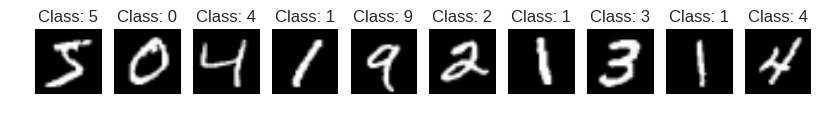

In [3]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:], cmap="gray")
    plt.title('Class: '+str(y_train[i]))

### 1-NN luokitin

In [4]:
n_neighbors = 1
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train.reshape(-1,28*28), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [5]:
t0 = time()
predictions = clf.predict(X_test[:100,:,:].reshape(-1,28*28))
print("Kulunut aika: %.2fs" % (time()-t0))

Kulunut aika: 8.27s


In [6]:
print("Ennakoitu", len(predictions), "numeroa tarkkuudella:", accuracy_score(y_test[:100], predictions))

Ennakoitu 100 numeroa tarkkuudella: 1.0


In [7]:
time()

1485340896.9222076

### Nopeampi 1-NN

Pienennetään koulutusdatan määrää, jotta algoritmi olisi nopeampi.

In [8]:
n_neighbors = 1
clf_reduced = neighbors.KNeighborsClassifier(n_neighbors)
clf_reduced.fit(X_train[:1024,:,:].reshape(-1,28*28), y_train[:1024])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [9]:
t0 = time()
predictions_reduced = clf_reduced.predict(X_test.reshape(-1,28*28))
print("Kulunut aika: %.2fs" % (time()-t0))

Kulunut aika: 13.61s


In [10]:
print("Ennakoitu", len(predictions_reduced), "numeroa tarkkuudella:", accuracy_score(y_test, predictions_reduced))

Ennakoitu 10000 numeroa tarkkuudella: 0.8715


Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


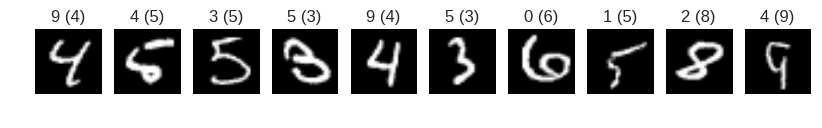

In [11]:
def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=10):
    errors = predictions!=y_test
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(X_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and predictions[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(X_test[i,:,:], cmap="gray")
            plt.title("%d (%d)" % (predictions[i], y_test[i]))
            ii = ii + 1
            
show_failures(predictions_reduced)

Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


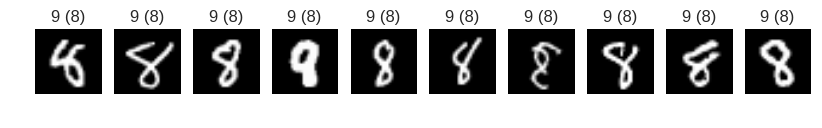

In [12]:
show_failures(predictions_reduced, trueclass=8, predictedclass=9)

### Testailua

In [22]:
n_neighbors = 4
clf_testi = neighbors.KNeighborsClassifier(n_neighbors)
clf_testi.fit(X_train[:3000,:,:].reshape(-1,28*28), y_train[:3000])

t0 = time()
predictions_testi = clf_testi.predict(X_test.reshape(-1,28*28))
print("Kulunut aika: %.2fs" % (time()-t0))

print("Ennakoitu", len(predictions_testi), "numeroa tarkkuudella:", accuracy_score(y_test, predictions_testi))

Kulunut aika: 40.83s
Ennakoitu 10000 numeroa tarkkuudella: 0.9147


In [26]:
n_neighbors = 3
clf_testi = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
clf_testi.fit(X_train[:3000,:,:].reshape(-1,28*28), y_train[:3000])

t0 = time()
predictions_testi = clf_testi.predict(X_test.reshape(-1,28*28))
print("Kulunut aika: %.2fs" % (time()-t0))

print("Ennakoitu", len(predictions_testi), "numeroa tarkkuudella:", accuracy_score(y_test, predictions_testi))

Kulunut aika: 41.33s
Ennakoitu 10000 numeroa tarkkuudella: 0.9215


In [27]:
n_neighbors = 4
clf_testi = neighbors.KNeighborsClassifier(n_neighbors, algorithm = "kd_tree")
clf_testi.fit(X_train[:5000,:,:].reshape(-1,28*28), y_train[:5000])

t0 = time()
predictions_testi = clf_testi.predict(X_test.reshape(-1,28*28))
print("Kulunut aika: %.2fs" % (time()-t0))

print("Ennakoitu", len(predictions_testi), "numeroa tarkkuudella:", accuracy_score(y_test, predictions_testi))

Kulunut aika: 75.17s
Ennakoitu 10000 numeroa tarkkuudella: 0.9312


In [28]:
n_neighbors = 4
clf_testi = neighbors.KNeighborsClassifier(n_neighbors, weights="distance", algorithm = "kd_tree")
clf_testi.fit(X_train[:5000,:,:].reshape(-1,28*28), y_train[:5000])

t0 = time()
predictions_testi = clf_testi.predict(X_test.reshape(-1,28*28))
print("Kulunut aika: %.2fs" % (time()-t0))

print("Ennakoitu", len(predictions_testi), "numeroa tarkkuudella:", accuracy_score(y_test, predictions_testi))

Kulunut aika: 75.22s
Ennakoitu 10000 numeroa tarkkuudella: 0.9378


In [30]:
n_neighbors = 4
clf_testi = neighbors.KNeighborsClassifier(n_neighbors, weights="distance", algorithm = "kd_tree")
clf_testi.fit(X_train[:10000,:,:].reshape(-1,28*28), y_train[:10000])

t0 = time()
predictions_testi = clf_testi.predict(X_test.reshape(-1,28*28))
print("Kulunut aika: %.2fs" % (time()-t0))

print("Ennakoitu", len(predictions_testi), "numeroa tarkkuudella:", accuracy_score(y_test, predictions_testi))

Kulunut aika: 152.64s
Ennakoitu 10000 numeroa tarkkuudella: 0.9505


In [35]:
n_neighbors = 3
clf_testi = neighbors.KNeighborsClassifier(n_neighbors, weights="distance", algorithm = "ball_tree", p = 1)
clf_testi.fit(X_train[:10000,:,:].reshape(-1,28*28), y_train[:10000])

t0 = time()
predictions_testi = clf_testi.predict(X_test.reshape(-1,28*28))
print("Kulunut aika: %.2fs" % (time()-t0))

print("Ennakoitu", len(predictions_testi), "numeroa tarkkuudella:", accuracy_score(y_test, predictions_testi))

Kulunut aika: 111.06s
Ennakoitu 10000 numeroa tarkkuudella: 0.9406


In [29]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

luokitin = NearestCentroid()
luokitin.fit(X_train[:3000,:,:].reshape(-1,28*28), y_train[:3000])


t0 = time()
predictions_testi = luokitin.predict(X_test.reshape(-1,28*28))
print("Kulunut aika: %.2fs" % (time()-t0))

print("Ennakoitu", len(predictions_testi), "numeroa tarkkuudella:", accuracy_score(y_test, predictions_testi))

Kulunut aika: 0.08s
Ennakoitu 10000 numeroa tarkkuudella: 0.8
